In [1]:
import tweepy

In [30]:
API_KEY = 'hGwC17TsW1W99swjFCXPwi5i9'
API_SECRET = 'KmgC8oGcs7uvl9B7HDMi8KUUSAzsTPOPr3vHVt9XJOiks7C5Lw'
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAFqzcgEAAAAAh%2BilS8IkEYr68z%2BPlwkAGa0CAys%3Du3jZnN5YlQE3OS1hZUEq942I1fQ0kbriuNfuUyla7IqJKqL6CF'
ACCESS_TOKEN = '1519454932876808194-D8CTAAIZuvBdrqWuPecRSNX1p0S3cf'
ACCESS_TOKEN_SECRET = 'pUZatEZVOuTqBdFaBFAvts9A3hj3y7PvLaLKTpSIxUac9'

In [31]:
client = tweepy.Client(bearer_token=BEARER_TOKEN)

In [32]:
query = 'Lula ladrao OR Bolsonaro gado -is:retweet'

response = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'public_metrics'], expansions=['author_id'])

In [33]:
tweets = [tweet for tweet in response.data]

In [34]:
save_tweets = open('Tweets.txt', 'a')

for tweet in tweets:
    first_line = str(tweet['author_id']) + " " + tweet['text'] + "\n"     
    save_tweets.write(first_line)
    second_line = "retweet_count: " +  str(tweet.public_metrics['retweet_count']) + ", " + "reply_count: " + str(tweet.public_metrics['reply_count']) + ", " + "like_count: " + str(tweet.public_metrics['like_count']) + ", " + "quote_count: " + str(tweet.public_metrics['quote_count']) + "\n"
    save_tweets.write(second_line)
save_tweets.close()

In [35]:
read_tweets = open('Tweets.txt', 'r')
user_tweets = []
public_metrics = []
read = read_tweets.read().split('\n')

word = ''
for i in read:
    if i.find('retweet_count: ') != -1:
        public_metrics.append(i)
        user_tweets.append(word)
        word = ''
        continue        
    word += i 

read_tweets.close()

In [36]:
retweet_count = []
reply_count = []
like_count = []
quote_count = []

numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
count = 0

for i in public_metrics:
    number = ''
    for j in i:
        if j in numbers:
            number += j
        if j == ',':
            if count == 0:
                retweet_count.append(int(number))
                number = ''
                count += 1
            elif count == 1:
                reply_count.append(int(number))
                number = ''
                count += 1
            elif count == 2:
                like_count.append(int(number))
                number = ''
                count += 1
    if i.endswith(number):
        quote_count.append(int(number))
        number = ''
        count = 0 

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
total_retweets = sum(retweet_count)
total_reply = sum(reply_count)
total_like = sum(like_count)
total_quote = sum(quote_count)

Text(0.5, 0.98, 'Engagement')

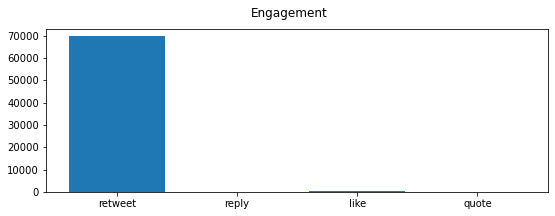

In [39]:
x_plot = ["retweet", "reply", "like", "quote"]
y_plot = [total_retweets, total_reply, total_like, total_quote]

fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.bar(x_plot, y_plot)
fig.suptitle('Engagement')

In [40]:
def getFollwersOfMostRetweetUser(user_tweets, retweet_count):
    index_max = retweet_count.index(max(retweet_count))
    user_with_most_retweets = user_tweets[index_max].split(" ")
    id_user_with_most_retweets = user_with_most_retweets[0]    
    
    followers = client.get_users_followers(int(id_user_with_most_retweets), max_results=1000)[0]
    
    return (max(retweet_count), len(followers), user_with_most_retweets)

max_retweets, followers_count, user_most_retweets = getFollwersOfMostRetweetUser(user_tweets, retweet_count)

In [41]:
print(max_retweets, followers_count)

1476 446


['RT', '@LuizCor24841840:', '93', 'mortos,', '26', 'desaparecidos', 'e', '6', 'mil', 'desabrigados', 'e', 'o', 'prefeito', 'de', 'Recife', 'em', 'São', 'Paulo', 'em', 'reuniões', 'da', 'campanha', 'de', 'Lula', 'l…']


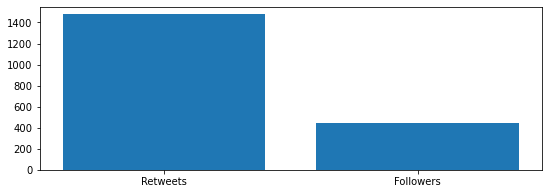

In [42]:
x_user_most_retweets = ['Retweets', 'Followers']
y_user_most_retweets = [max_retweets, followers_count]

fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.bar(x_user_most_retweets, y_user_most_retweets)
print(user_most_retweets[1:])

In [43]:
# #famous tweets - waiting elevated access

# # authorization of consumer key and consumer secret
# auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
  
# # set access to user's access key and access secret 
# auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
  
# # calling the api 
# api = tweepy.API(auth)

# # fetching the user
# user = api.get_user(screen_name="DaniloGentili") #17.2M Followers
  
# # fetching the ID
# ID = user.id_str
  
# print("The ID of the user is : " + ID)